In [19]:
# !pip install -r requirements.txt

In [3]:
import pandas as pd
data = pd.read_csv('data/shock_patients_processed.csv')

In [6]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Columns to be used as predictors
predictor_columns = [
    'covid', 'code_status', 'apache_score', 'apache_pred_mort', 'vfd', 'los',
    'twa', 'age', 'gestation_age', 'gender', 'height', 'weight', 'type_of_admission',
    'foley_hours', 'cvc_hours', 'vented_hours', 'los_in_hours', 'imv_hours', 'niv_hours',
    'imv_vent_days', 'niv_vent_days', 'total_vent_days', 'hfnc_days', 'hfnc_hours',
    'age_in_days', 'unit_name', 'unit_specialty', 'hospital_name', 'city_code', 'state_code',
    'country_code', 'max_Hb', 'min_Hb', 'first_Hb', 'max_Urea', 'min_Urea', 'first_Urea',
    'max_Creatinine', 'min_Creatinine', 'first_Creatinine', 'max_%%(Lact)%%', 'min_%%(Lact)%%',
    'first_%%(Lact)%%', 'max_bp', 'min_bp', 'first_bp', 'max_fio2', 'min_fio2', 'first_fio2',
    'max_gcs', 'min_gcs', 'first_gcs', 'max_gcseyes', 'min_gcseyes', 'first_gcseyes',
    'max_gcsmotor', 'min_gcsmotor', 'first_gcsmotor', 'max_gcsverbal', 'min_gcsverbal',
    'first_gcsverbal', 'max_map', 'min_map', 'first_map', 'max_rr', 'min_rr', 'first_rr',
    'max_spo2', 'min_spo2', 'first_spo2', 'max_temperature', 'min_temperature', 'first_temperature',
    'age_category'
]

# Creating the target variable
data['target'] = (data['discharge_disposition'] == 'Death').astype(int)

# Selecting the predictor variables
X = data[predictor_columns]

# Handling categorical variables by using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = data['target']

# Filling missing values with the median of each column
X_filled = X.fillna(X.median(numeric_only=True))

# Splitting the filled data into training and testing sets
X_train_filled, X_test_filled, y_train, y_test = train_test_split(X_filled, y, test_size=0.2, random_state=42)

# Creating a new random forest classifier
clf_filled = RandomForestClassifier(random_state=42)

# Fitting the model with the filled data
clf_filled.fit(X_train_filled, y_train)

# Predicting the test set results
y_pred_filled = clf_filled.predict(X_test_filled)

# Calculating the accuracy
accuracy_filled = accuracy_score(y_test, y_pred_filled)

# Getting the feature importance using mean Gini distance
feature_importance_filled = clf_filled.feature_importances_

# Creating a DataFrame to display the feature importance
feature_importance_df_filled = pd.DataFrame({
    'Feature': X_filled.columns,
    'Importance': feature_importance_filled
}).sort_values(by='Importance', ascending=False)

# Displaying the accuracy and top 10 significant features
accuracy_filled, feature_importance_df_filled.head(10)

(0.9197530864197531,
             Feature  Importance
 2               vfd    0.090790
 52          min_map    0.041941
 36         max_fio2    0.039565
 40          min_gcs    0.037491
 46     min_gcsmotor    0.034458
 11     vented_hours    0.032871
 43      min_gcseyes    0.029491
 37         min_fio2    0.026704
 49    min_gcsverbal    0.026036
 17  total_vent_days    0.025648)

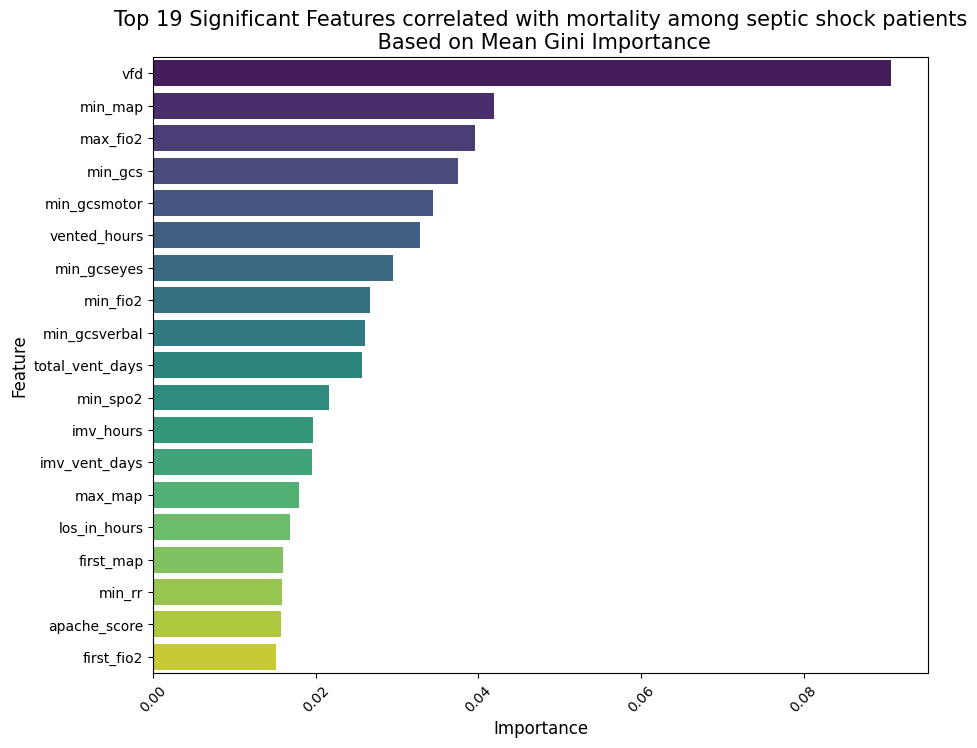

In [12]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

n_features = 19

# Selecting the top features for visualization
top_features = feature_importance_df_filled.head(n_features)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title(f'Top {n_features} Significant Features correlated with mortality among septic shock patients\n Based on Mean Gini Importance', fontsize=15)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(rotation=45)
plt.savefig(f'data/Top {n_features} Gini features.png')
plt.show()

## Interpreting variables using decision tree

In [16]:
# Step 1: Create a simple dummy dataset
import pandas as pd
import numpy as np

# Create a random seed for reproducibility
np.random.seed(42)

# Create a DataFrame with two features and one target variable
data = {
    'Feature1': np.random.randint(0, 10, 20),
    'Feature2': np.random.randint(20, 30, 20),
    'Target': np.random.choice(['A', 'B'], 20)
}

df = pd.DataFrame(data)

df.head()


,Feature1,Feature2,Target
0,6,24,A
1,3,20,B
2,7,29,B
3,4,25,B
4,6,28,B


In [17]:
# Step 2: Train a decision tree model
from sklearn.tree import DecisionTreeClassifier

# Separate features and target
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Initialize and fit the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)


DecisionTreeClassifier(random_state=42)

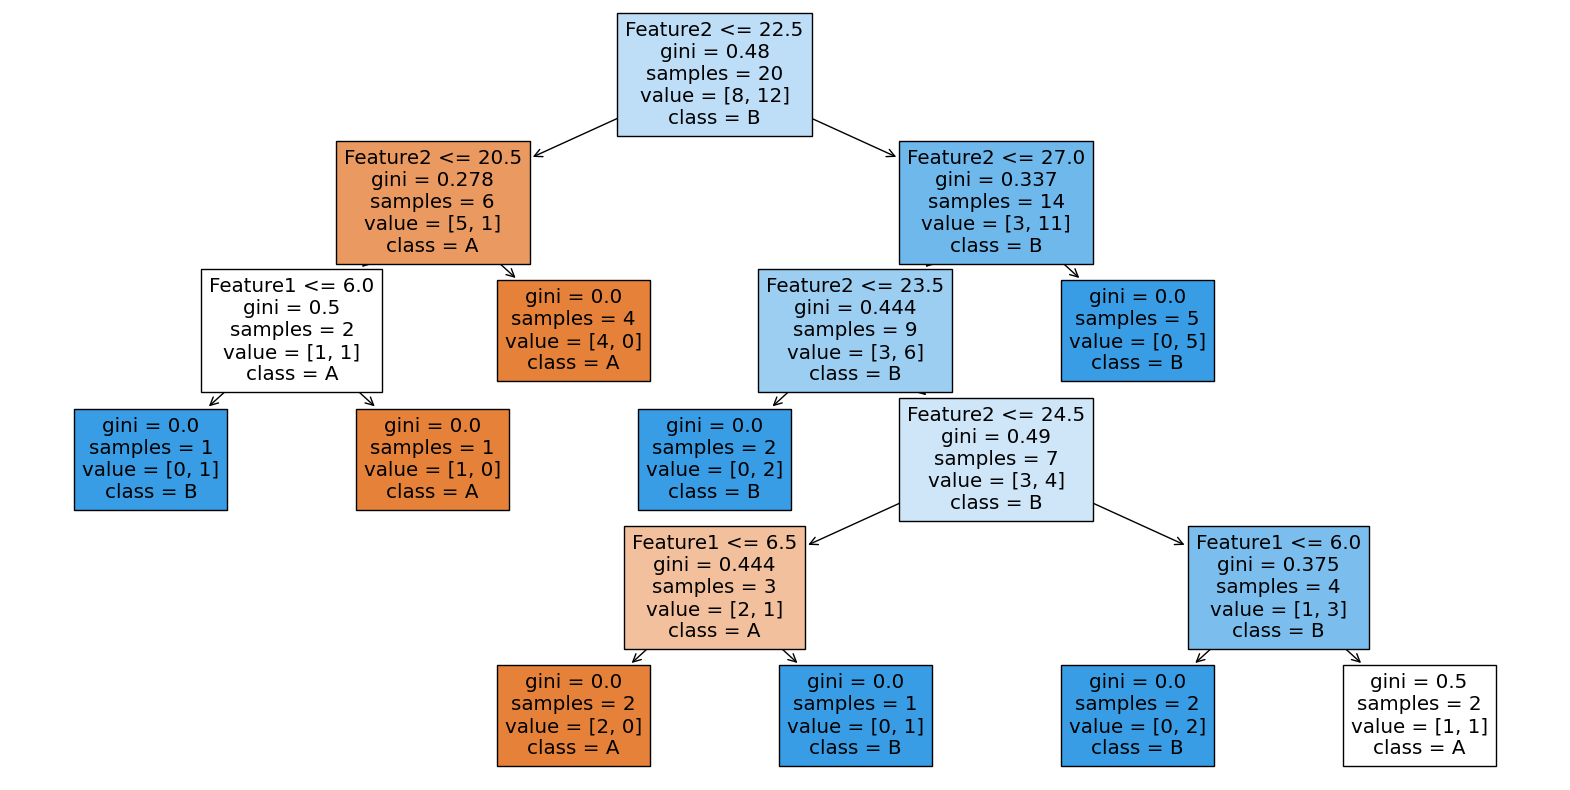

In [18]:
# Step 3: Visualize the decision tree model
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=['Feature1', 'Feature2'], class_names=['A', 'B'], filled=True)
plt.show()


samples: The number of samples at that node.
value: How many samples of each class are at that node. For example, [m, n] means there are m samples of class 'A' and n samples of class 'B'.
class: The class that would be predicted for all samples at that node.
gini: A measure of impurity. The lower the better, with 0 being totally pure (only one class present).
The tree starts at the top node and makes decisions based on the features to decide which child node to go to next, until it reaches a leaf node (the ones at the bottom with no children).